In [1]:
from landlab.io import read_esri_ascii
from landlab.plot.imshow import imshow_grid
import numpy as np

In [13]:
(mg, z) = read_esri_ascii("land_pre_river_natural_smooth.asc", name="topographic__elevation")

#https://landlab.readthedocs.io/en/master/user_guide/field_io.html

(_, K_sp) = read_esri_ascii("ksp_coeff.asc")
(_, uplift_rate) = read_esri_ascii("uplift_coeff_metre_p_year.asc")

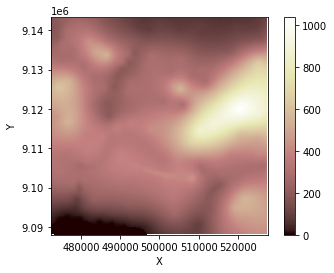

In [14]:
%matplotlib inline
min_z = np.min(z[np.where(z != 1.70141000000000007E+38)])
max_z = np.max(z[np.where(z != 1.70141000000000007E+38)])
#help(imshow_grid)
imshow_grid(mg, 'topographic__elevation', limits=(min_z, max_z))

In [12]:
z[np.where(z == 1.70141000000000007E+38)] = np.nan
K_sp[np.where(K_sp == 1.70141000000000007E+38)] = np.nan
uplift_rate[np.where(uplift_rate == 1.70141000000000007E+38)] = np.nan

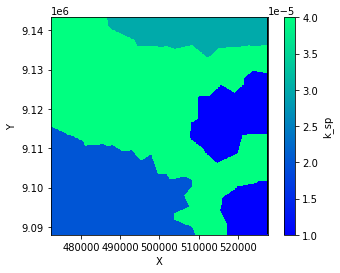

In [17]:
k_field = mg.add_field('linear_diffusivity', K_sp, at='node', clobber=True)
imshow_grid(mg, K_sp, var_name='k_sp', cmap='winter')

In [16]:
mg.set_closed_boundaries_at_grid_edges(True, False, True, False)
mg.set_nodata_nodes_to_closed(z, np.nan)